In [82]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import tensorflow as tf
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [83]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [84]:
# 부호 오류 고치기 코드
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [85]:
import warnings
warnings.filterwarnings(action='ignore')

In [86]:
os.chdir(r"C:\Users\82109\project\2021 빅데이터 경진대회\최종")

In [87]:
comp_1_one=pd.read_csv('pump1_concattt.csv')

TRAIN_SPLIT = 40000
# 45000

<AxesSubplot:>

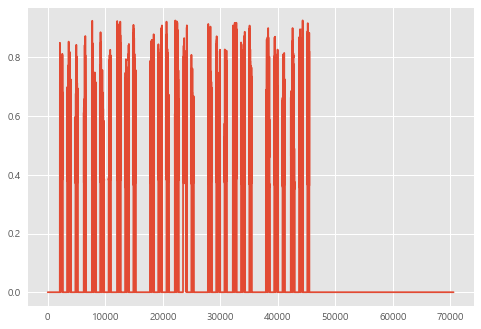

In [88]:
comp_1_one['역률평균'].plot()

In [89]:
comp_1_one.drop('Unnamed: 0', axis=1, inplace=True)

In [90]:
comp_1_one['TIMESTAMP'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('TIMESTAMP', inplace=True)

In [91]:
comp_1_one

,전류평균,온도,선간전압평균,상전압평균,유효전력평균,누적전력량,역률평균,주파수,전압고조파평균,무효전력평균
TIMESTAMP,,,,,,,,,,
2020-10-07 00:00:00,0.0,16.875,384.583,221.917,0.0,44759.500,0.0,59.901,5.729,0.0
2020-10-07 00:01:00,0.0,17.500,384.000,221.500,0.0,44759.500,0.0,59.891,5.632,0.0
2020-10-07 00:02:00,0.0,16.250,384.833,222.000,0.0,44759.500,0.0,59.957,5.729,0.0
2020-10-07 00:03:00,0.0,17.500,384.000,221.667,0.0,44759.500,0.0,59.901,5.957,0.0
2020-10-07 00:04:00,0.0,16.875,384.167,221.667,0.0,44759.500,0.0,59.929,6.250,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-11-24 23:55:08,0.0,2.500,0.000,0.000,0.0,133013.141,0.0,0.000,0.000,0.0
2020-11-24 23:56:08,0.0,2.500,0.000,0.000,0.0,133013.141,0.0,0.000,0.000,0.0
2020-11-24 23:57:08,0.0,2.500,0.000,0.000,0.0,133013.141,0.0,0.000,0.000,0.0


In [92]:
X = comp_1_one
X_train = comp_1_one[:40000]
X_test = comp_1_one[40000:45000]
X_train = X_train[['온도', '상전압평균', '유효전력평균', '누적전력량',  '주파수', '전압고조파평균', '무효전력평균','역률평균']]
X_test = X_test[['온도', '상전압평균', '유효전력평균', '누적전력량',  '주파수', '전압고조파평균', '무효전력평균','역률평균']]

In [93]:
from sklearn import preprocessing

# preprocessing.MinMaxScaler()
# preprocessing.StandardScaler()
# preprocessing.RobustScaler()
# preprocessing.Normalizer()

# 1. 스케일러를 선택 후 스케일러 객체를 지정한다
scaler = preprocessing.StandardScaler()

# 2. 스케일러 객체의 fit()함수를 이용하여 필요한 파라미터를 저장한다
# scaler_fit에는 칼럼별 최대와 최소값이 저장되어있다.
scaler_fit = scaler.fit(X)

# 3. 스케일러 객체의 transform()함수를 이용하여 스케일링을 수행한다
result=scaler_fit.transform(X)

In [94]:
def feature_engineering_scaling(scaler, X_train, X_test):
    # scaler파라미터는 아래 4개중 하나를 넣는다
    # preprocessing.MinMaxScaler()
    # preprocessing.StandardScaler()
    # preprocessing.RobustScaler()
    # preprocessing.Normalizer()
    scaler = scaler
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                               index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                               index=X_test.index, columns=X_test.columns)
    return X_train_scaling, X_test_scaling

In [95]:
X_train_scaling, X_test_scaling = feature_engineering_scaling(scaler, X_train, X_test)

In [96]:
X_train_scaling = X_train_scaling[['온도', '상전압평균', '유효전력평균', '누적전력량',  '주파수', '전압고조파평균', '무효전력평균','역률평균']]
X_test_scaling = X_test_scaling[['온도', '상전압평균', '유효전력평균', '누적전력량',  '주파수', '전압고조파평균', '무효전력평균','역률평균']]
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['온도', '상전압평균', '유효전력평균', '누적전력량',  '주파수', '전압고조파평균', '무효전력평균']]
X_test = X_test_scaling[['온도', '상전압평균', '유효전력평균', '누적전력량',  '주파수', '전압고조파평균', '무효전력평균']]

In [97]:
seasonal_lag = 6

for i in X_train_scaling.columns:
    X_train_scaling[i]=X_train_scaling[i].diff(seasonal_lag)
    
for i in X_test_scaling.columns:
    X_test_scaling[i]=X_test_scaling[i].diff(seasonal_lag)

In [98]:
X_train_scaling = X_train_scaling.dropna()
X_test_scaling = X_test_scaling.dropna()

In [99]:
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['온도', '상전압평균', '유효전력평균', '누적전력량',  '주파수', '전압고조파평균', '무효전력평균']]
X_test = X_test_scaling[['온도', '상전압평균', '유효전력평균', '누적전력량',  '주파수', '전압고조파평균', '무효전력평균']]

In [100]:
X_train_scaling[:40000]

,온도,상전압평균,유효전력평균,누적전력량,주파수,전압고조파평균,무효전력평균,역률평균
TIMESTAMP,,,,,,,,
2020-10-07 00:06:00,0.163669,-0.086497,0.000000,0.000000,1.508851,0.396899,0.000000,0.000000
2020-10-07 00:07:00,0.000000,0.237479,0.000000,0.000000,1.508851,0.279405,0.000000,0.000000
2020-10-07 00:08:00,0.327338,0.064744,0.000000,0.000000,-0.609961,0.046568,0.000000,0.000000
2020-10-07 00:09:00,0.000000,0.172477,0.000000,0.000000,0.898890,-0.116777,0.000000,0.000000
2020-10-07 00:10:00,0.000000,0.000000,0.000000,0.000000,0.000000,-0.139703,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2020-11-03 18:35:15,0.000000,0.064744,-0.305065,0.002443,0.600330,0.046643,0.035192,-0.308923
2020-11-03 18:36:15,-0.163669,0.021580,-1.034860,0.002285,0.900655,0.046642,0.038184,-0.808291
2020-11-03 18:37:15,0.000000,0.021580,-1.416863,0.002040,0.600651,0.139927,0.052907,-1.246792


In [101]:
X_test_scaling

,온도,상전압평균,유효전력평균,누적전력량,주파수,전압고조파평균,무효전력평균,역률평균
TIMESTAMP,,,,,,,,
2020-11-03 18:46:15,0.000000,-0.086328,-0.500922,0.001886,0.899371,0.163248,0.003232,-0.530328
2020-11-03 18:47:15,0.163669,0.021584,-0.378567,0.001826,0.601100,0.326495,0.019032,-0.417454
2020-11-03 18:48:15,0.000000,0.107907,-0.418157,0.001719,-1.200339,0.163248,0.041297,-0.472508
2020-11-03 18:49:15,0.163669,0.215811,-0.321498,0.001627,0.597376,0.303174,0.061526,-0.386000
2020-11-03 18:50:15,-0.163669,0.043164,0.000896,0.001611,-0.000353,0.396459,-0.003711,0.003185
...,...,...,...,...,...,...,...,...
2020-11-07 05:55:00,-0.327338,0.302138,0.000000,0.000000,1.199536,-0.233211,0.000000,0.000000
2020-11-07 05:56:00,-0.327338,0.215811,0.000000,0.000000,-1.800348,-0.046642,0.000000,0.000000
2020-11-07 05:57:00,-0.163669,0.107903,0.000000,0.000000,0.599945,-0.163247,0.000000,0.000000


In [102]:
from pycaret.regression import *

clf = setup(data = X_train_scaling, target = '역률평균', train_size = 0.8, session_id = 6)

,Description,Value
0,session_id,6
1,Target,역률평균
2,Original Data,"(39994, 8)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(31995, 7)"


In [103]:
best5models = compare_models(sort = 'RMSE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0170,0.0041,0.0635,0.9780,0.0339,0.2212,2.3620
rf,Random Forest Regressor,0.0168,0.0043,0.0646,0.9771,0.0340,0.2186,5.1490
xgboost,Extreme Gradient Boosting,0.0176,0.0044,0.0656,0.9764,0.0343,0.4133,1.3210
lightgbm,Light Gradient Boosting Machine,0.0178,0.0046,0.0670,0.9754,0.0344,0.3768,0.2170
catboost,CatBoost Regressor,0.0178,0.0047,0.0676,0.9749,0.0339,0.7236,8.1980
gbr,Gradient Boosting Regressor,0.0224,0.0051,0.0713,0.9724,0.0387,0.7599,1.4160
dt,Decision Tree Regressor,0.0215,0.0078,0.0877,0.9582,0.0461,0.3005,0.0900
huber,Huber Regressor,0.0317,0.0216,0.1133,0.4840,0.0483,0.9210,0.4370
knn,K Neighbors Regressor,0.0389,0.0131,0.1143,0.9293,0.0652,0.6220,0.6300
ada,AdaBoost Regressor,0.0547,0.0165,0.1284,0.9112,0.0722,1.1788,0.4870


In [104]:
best5models

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=6, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6, verbose=0, warm_start=False),
 XGBRegressor

In [105]:
et = create_model('et', fold = 5, cross_validation = True)
rf = create_model('rf', fold = 5, cross_validation = True)
xgb = create_model('xgboost', fold = 5, cross_validation = True)
lh = create_model('lightgbm', fold = 5, cross_validation = True)
cat = create_model('catboost', fold = 5, cross_validation = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0179,0.0043,0.0654,0.9784,0.0325,0.8785
1,0.0184,0.0040,0.0629,0.9788,0.0331,0.6950
2,0.0174,0.0039,0.0626,0.9780,0.0327,0.5037
3,0.0185,0.0065,0.0807,0.9657,0.0365,0.6020
4,0.0175,0.0041,0.0642,0.9767,0.0329,0.5446
Mean,0.0179,0.0046,0.0672,0.9755,0.0335,0.6447
SD,0.0004,0.0010,0.0068,0.0050,0.0015,0.1334


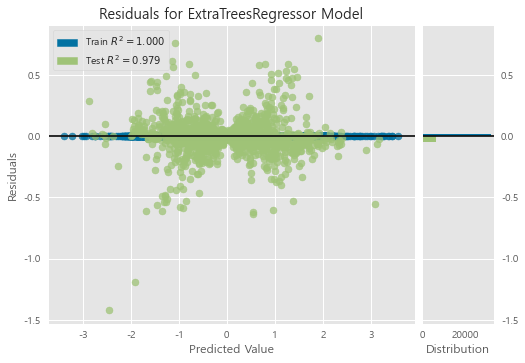

In [106]:
plot_model(et)

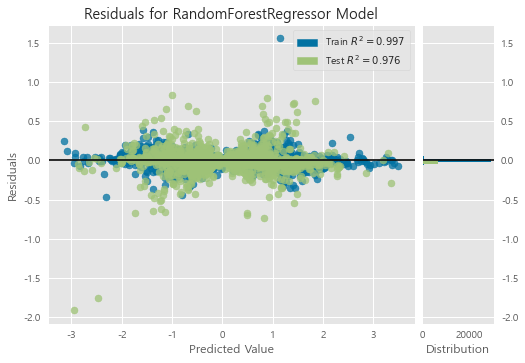

In [107]:
plot_model(rf)

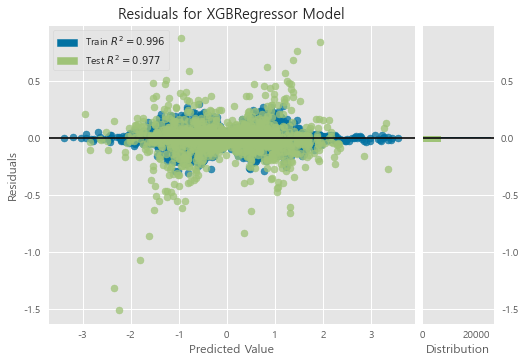

In [108]:
plot_model(xgb)

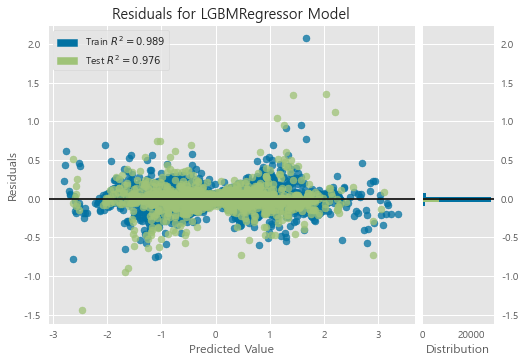

In [109]:
plot_model(lh)

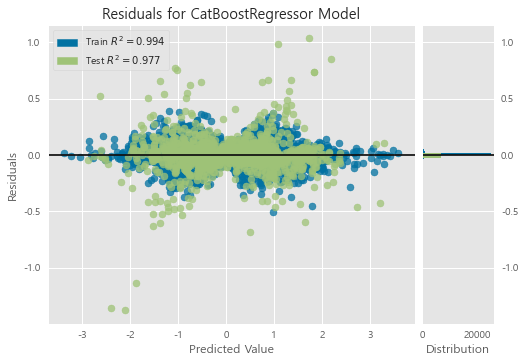

In [110]:
plot_model(cat)

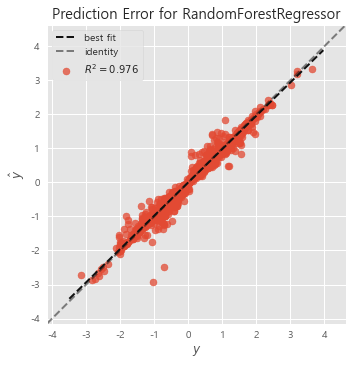

In [111]:
plot_model(rf, plot='error')

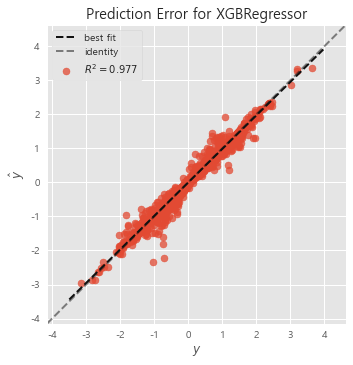

In [112]:
plot_model(xgb, plot='error')

In [113]:
final_model = finalize_model(rf)
pred = predict_model(final_model, data = X_test)

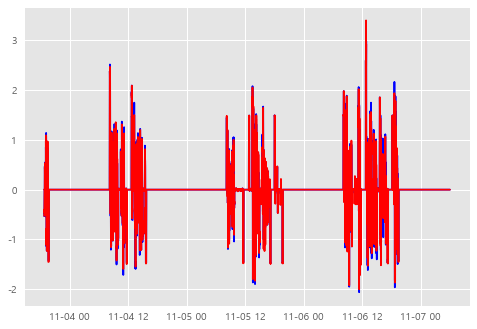

In [114]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

In [115]:
final_model = finalize_model(xgb)
pred = predict_model(final_model, data = X_test)

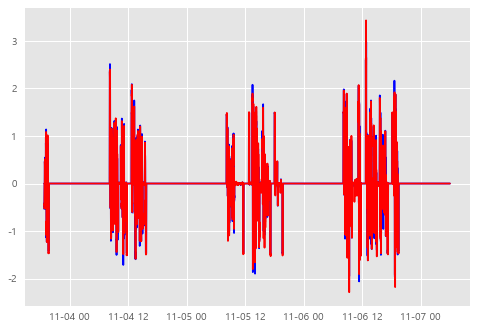

In [116]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

In [117]:
# 모델 블렌딩

blender_specific = blend_models(estimator_list = [rf,xgb,lh], optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0160,0.0036,0.0598,0.9815,0.0327,0.3881
1,0.0157,0.0029,0.0534,0.9860,0.0280,0.3725
2,0.0164,0.0036,0.0603,0.9811,0.0324,0.2437
3,0.0170,0.0036,0.0602,0.9799,0.0323,0.3232
4,0.0178,0.0038,0.0617,0.9790,0.0333,0.2503
5,0.0155,0.0036,0.0602,0.9793,0.0318,0.2997
6,0.0183,0.0080,0.0895,0.9588,0.0382,0.2948
7,0.0159,0.0035,0.0595,0.9809,0.0327,0.2551
8,0.0176,0.0043,0.0655,0.9758,0.0349,0.2681
9,0.0156,0.0035,0.0592,0.9802,0.0324,0.2924


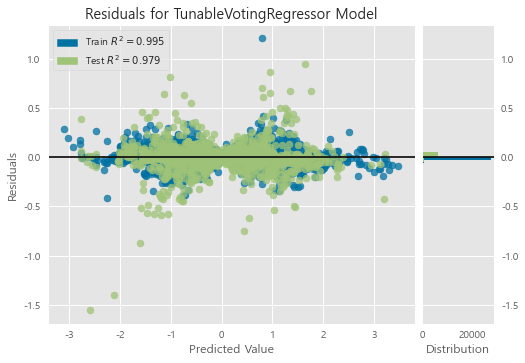

In [118]:
plot_model(blender_specific)

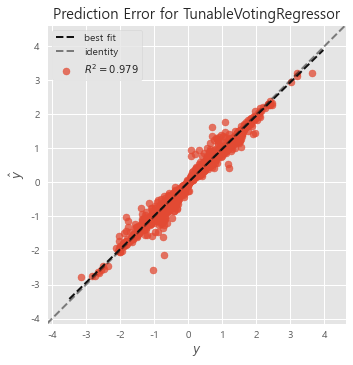

In [119]:
plot_model(blender_specific, plot='error')

In [120]:
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data = X_test)

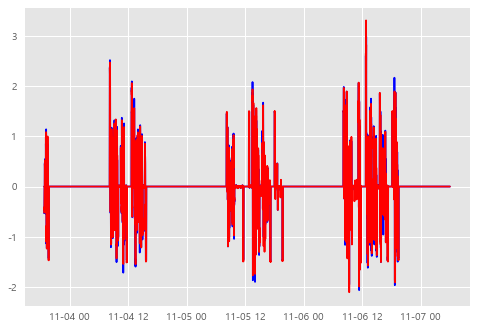

In [121]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')